In [161]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from scipy.io import loadmat 

In [162]:
import sys
print(sys.executable)

C:\Users\haylk\Anaconda3\envs\hhh\python.exe


# select random points

In [163]:
def init_centroids(X, k): 
    m, n = X.shape 
    centroids = np.zeros((k, n)) 
    idx = np.random.randint(0, m, k) 

    for i in range(k):
        centroids[i,:] = X[idx[i],:] 

    return centroids 

# centroid function 

In [164]:
def find_closest_centroids(X, centroids): 
    m = X.shape[0] 
    k = centroids.shape[0] 
    idx = np.zeros(m) 


    for i in range(m): 
        min_dist = 1000000 
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2) 
            if dist < min_dist:
                min_dist = dist 
                idx[i] = j 

    return idx 



# centroid maker 

In [165]:
def compute_centroids(X, idx, k): 
    m, n = X.shape 
    centroids = np.zeros((k, n)) 

    for i in range(k):
        indices = np.where(idx == i) 
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel() 

    return centroids 

# k means function 

In [166]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape 
    k = initial_centroids.shape[0] 
    idx = np.zeros(m) 
    centroids = initial_centroids 

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids) 
        centroids = compute_centroids(X, idx, k) 

    return idx, centroids 

# PCA Fun

In [167]:
def pca(X): 
    # normalize the features 
    X = (X - X.mean()) / X.std() 

    # compute the covariance matrix 
    X = np.matrix(X) 
    cov = (X.T * X) / X.shape[0] 
    # print('cov \n', cov) 
    # print() 
    # perform SVD 
    U, S, V = np.linalg.svd(cov) # singular value decomposition 

    return U, S, V 

In [168]:
def project_data(X, U, k):
    U_reduced = U[:,:k] 
    return np.dot(X, U_reduced) 

In [169]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k] 
    return np.dot(Z, U_reduced.T) 

# load data 

In [170]:
data = loadmat('D:\\aa\\dldb\\ha\\ex7data2.mat') 
# print(data) 
# print(data['X']) 
# print(data['X'].shape) 

# classify points

In [171]:
X = data['X'] 
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]) 
initial_centroids = np.array([[8, 0], [8, 6], [0, 3]]) 
initial_centroids = init_centroids(X, 3) 
print(initial_centroids ) 
idx = find_closest_centroids(X, initial_centroids) 
print(idx)   

[[5.132009   2.19812195]
 [3.23197916 4.93989405]
 [7.65503226 2.87095628]]
[1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 2. 2. 0. 2. 0. 0.
 0. 2. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 0. 0.
 2. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 0. 2. 0.
 2. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0. 1.]


# calculate new centroid 

In [172]:
c = compute_centroids(X, idx, 3) 
print(c) 
for x in range(6):
    #apply k means 
    idx, centroids = run_k_means(X, initial_centroids, x) 
    print(idx) 
    print('======================================')  
    print(centroids )

[[4.0008031  1.73662091]
 [2.02038104 5.02812538]
 [6.86507952 3.01421865]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[5.132009

# draw it

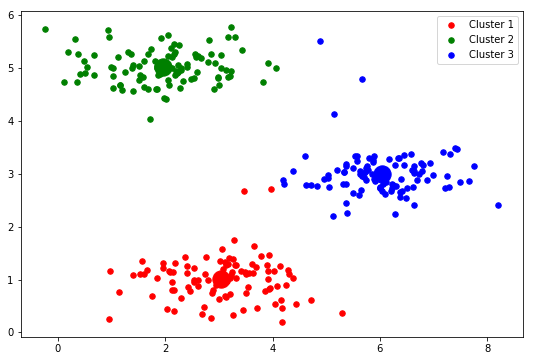

In [173]:
cluster1 = X[np.where(idx == 0)[0],:] 
cluster2 = X[np.where(idx == 1)[0],:] 
cluster3 = X[np.where(idx == 2)[0],:] 

fig, ax = plt.subplots(figsize=(9,6)) 
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1') 
ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r') 

ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2') 
ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g') 

ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3') 
ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b') 

ax.legend() 

____________
# we need to compress the image 

In [174]:
image_data = loadmat('D:\\aa\\dldb\\ha\\bird_small.mat') 
print(image_data) 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Nov 29 23:36:07 2011', '__version__': '1.0', '__globals__': [], 'A': array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  

(128, 128, 3)


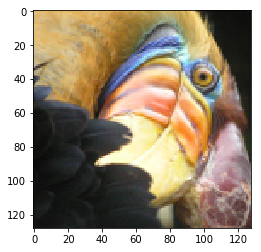

In [175]:
A = image_data['A'] 
print(A.shape) 
plt.imshow(A) 

# normalize value ranges

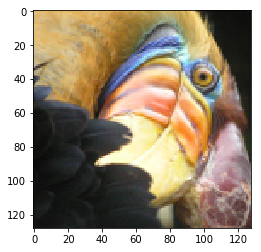

In [176]:
A = A / 255.
plt.imshow(A)

# reshape the array 

(300, 2)
(16384, 3)


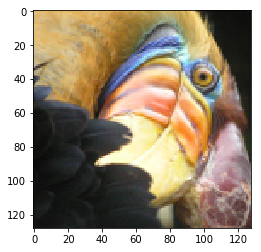

In [177]:
print(X.shape)
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) 
print(X.shape) 
plt.imshow(A)

# randomly initialize the centroids 

In [178]:
initial_centroids = init_centroids(X, 16) 
print(initial_centroids) 

[[0.70196078 0.47058824 0.17647059]
 [0.19607843 0.16862745 0.17254902]
 [0.25882353 0.28235294 0.30588235]
 [0.38823529 0.37647059 0.34117647]
 [0.81960784 0.65098039 0.3372549 ]
 [0.35294118 0.27058824 0.27058824]
 [0.8627451  0.75294118 0.53333333]
 [0.14117647 0.1372549  0.11764706]
 [0.0745098  0.08235294 0.0627451 ]
 [0.09803922 0.09803922 0.0745098 ]
 [0.58039216 0.61176471 0.47058824]
 [0.09019608 0.08627451 0.07843137]
 [0.8627451  0.81176471 0.52941176]
 [0.99607843 0.96862745 0.74117647]
 [0.13333333 0.14509804 0.1372549 ]
 [0.81568627 0.67843137 0.47843137]]


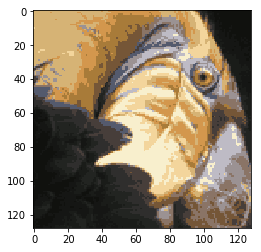

In [179]:
# run the algorithm 
idx, centroids = run_k_means(X, initial_centroids, 10) 

# get the closest centroids one last time 
idx = find_closest_centroids(X, centroids) 

# map each pixel to the centroid value 
X_recovered = centroids[idx.astype(int),:] 

# reshape to the original dimensions 
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2])) 

plt.imshow(X_recovered) 

# Apply PCA 

(50, 2)
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.67948113]
 [1.79709714 3.24753885]
 [4.3225147  5.11

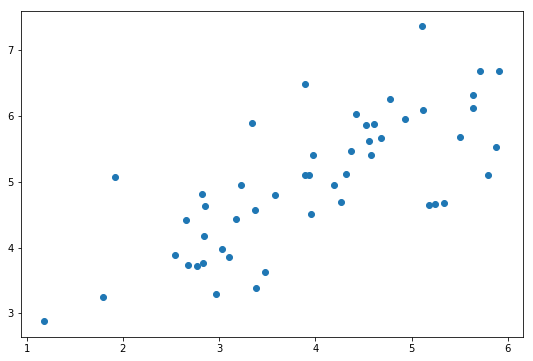

In [180]:
data = loadmat('D:\\aa\\dldb\\ha\\ex7data1.mat') 
X = data['X'] 
print(X.shape) 
print(X) 
print() 
fig, ax = plt.subplots(figsize=(9,6)) 
ax.scatter(X[:, 0], X[:, 1]) 
U, S, V = pca(X) 
print(U) 
print() 
print(S) 
print() 
print(V) 

In [181]:
Z = project_data(X, U, 1) 
print(Z) 

[[-4.74689738]
 [-7.15889408]
 [-4.79563345]
 [-4.45754509]
 [-4.80263579]
 [-7.04081342]
 [-4.97025076]
 [-8.75934561]
 [-6.2232703 ]
 [-7.04497331]
 [-6.91702866]
 [-6.79543508]
 [-6.3438312 ]
 [-6.99891495]
 [-4.54558119]
 [-8.31574426]
 [-7.16920841]
 [-5.08083842]
 [-8.54077427]
 [-6.94102769]
 [-8.5978815 ]
 [-5.76620067]
 [-8.2020797 ]
 [-6.23890078]
 [-4.37943868]
 [-5.56947441]
 [-7.53865023]
 [-7.70645413]
 [-5.17158343]
 [-6.19268884]
 [-6.24385246]
 [-8.02715303]
 [-4.81235176]
 [-7.07993347]
 [-5.45953289]
 [-7.60014707]
 [-4.39612191]
 [-7.82288033]
 [-3.40498213]
 [-6.54290343]
 [-7.17879573]
 [-5.22572421]
 [-4.83081168]
 [-7.23907851]
 [-4.36164051]
 [-6.44590096]
 [-2.69118076]
 [-4.61386195]
 [-5.88236227]
 [-7.76732508]]


In [182]:
X_recovered = recover_data(Z, U, 1) 
print(X_recovered) 
print(X_recovered.shape) 

[[3.76152442 2.89550838]
 [5.67283275 4.36677606]
 [3.80014373 2.92523637]
 [3.53223661 2.71900952]
 [3.80569251 2.92950765]
 [5.57926356 4.29474931]
 [3.93851354 3.03174929]
 [6.94105849 5.3430181 ]
 [4.93142811 3.79606507]
 [5.58255993 4.29728676]
 [5.48117436 4.21924319]
 [5.38482148 4.14507365]
 [5.02696267 3.8696047 ]
 [5.54606249 4.26919213]
 [3.60199795 2.77270971]
 [6.58954104 5.07243054]
 [5.681006   4.37306758]
 [4.02614513 3.09920545]
 [6.76785875 5.20969415]
 [5.50019161 4.2338821 ]
 [6.81311151 5.24452836]
 [4.56923815 3.51726213]
 [6.49947125 5.00309752]
 [4.94381398 3.80559934]
 [3.47034372 2.67136624]
 [4.41334883 3.39726321]
 [5.97375815 4.59841938]
 [6.10672889 4.70077626]
 [4.09805306 3.15455801]
 [4.90719483 3.77741101]
 [4.94773778 3.80861976]
 [6.36085631 4.8963959 ]
 [3.81339161 2.93543419]
 [5.61026298 4.31861173]
 [4.32622924 3.33020118]
 [6.02248932 4.63593118]
 [3.48356381 2.68154267]
 [6.19898705 4.77179382]
 [2.69816733 2.07696807]
 [5.18471099 3.99103461]


# Apply PCA on faces 

(5000, 1024)


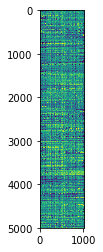

In [183]:
faces = loadmat('D:\\aa\\dldb\\ha\\ex7faces.mat') 
X = faces['X'] 
print(X.shape) 
plt.imshow(X) 

# show one face 

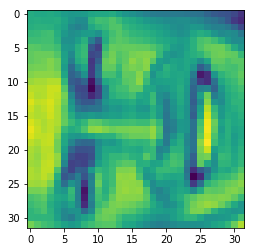

In [184]:
face = np.reshape(X[41,:], (32, 32)) 
plt.imshow(face) 

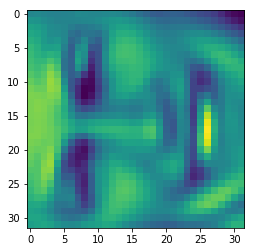

In [185]:
U, S, V = pca(X) 
Z = project_data(X, U, 100) 

X_recovered = recover_data(Z, U, 100) 
U, S, V = pca(X) 
face = np.reshape(X_recovered[41,:], (32, 32)) 
plt.imshow(face)  